<a href="https://colab.research.google.com/github/jojoroy/Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

https://www.datacamp.com/tutorial/decision-tree-classification-python

In [2]:
num_samples = 100

# Generate random features
feature_1 = np.random.normal(0, 1, num_samples)  # Normally distributed feature
feature_2 = np.random.uniform(0, 10, num_samples)  # Uniformly distributed feature
feature_3 = np.random.randint(0, 100, num_samples)  # Integer feature

# Generate binary labels (0 or 1)
# Example: Labels based on a condition
labels = (feature_1 + feature_2 > 5).astype(int)  # Label is 1 if the sum of feature_1 and feature_2 > 5

# Create the DataFrame
df = pd.DataFrame({
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3,
    'Label': labels
})

print(df.head())

   Feature_1  Feature_2  Feature_3  Label
0  -0.711742   5.381214         84      0
1   0.847948   4.508541         26      1
2  -1.955470   6.390181         29      0
3  -2.040763   7.347334         52      1
4  -0.263161   7.156203         76      1


In [12]:
df['Label'].sum()

52

In [3]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [5]:
feature_cols = ['Feature_1','Feature_2','Feature_3']
X = df[feature_cols] # Features
y = df['Label'] # Target variable

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [14]:
y_train.sum()

39

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [8]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9333333333333333


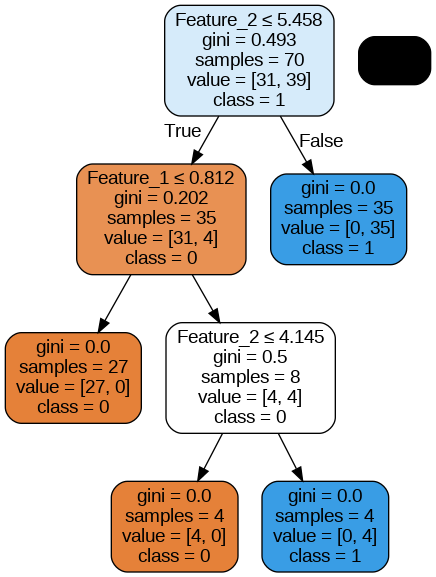

In [10]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [15]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


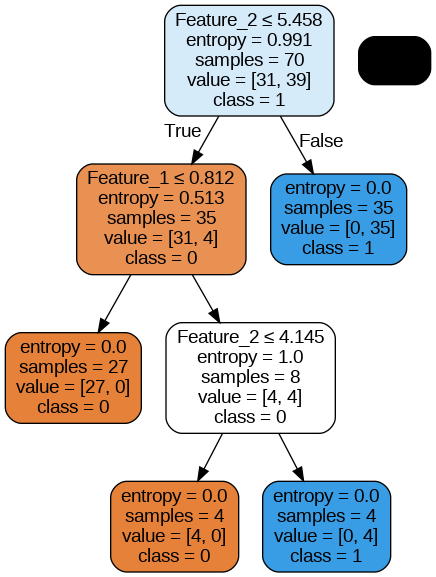

In [16]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())